In [4]:
pip install imblearn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1
Note: you may need to restart the kernel to use updated packages.


In [5]:
import sys
import sklearn
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, confusion_matrix, roc_auc_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import SMOTE

In [6]:
df = pd.read_csv("data.csv")
data = df
data1 = df

In [7]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [8]:
X = data.drop(['Bankrupt?'],axis=1)
y = data['Bankrupt?']

## Data Scaling and Splitting

In [13]:
# from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## PCA

### Ideal No. of Components (Dimensions)

In [14]:
pca = PCA(random_state=42)
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Bankrupt?'], axis=1),
    data['Bankrupt?'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((4773, 95), (2046, 95))

### Transformation

In [8]:
pca = PCA(n_components=0.95)
X = pca.fit_transform(X)

In [9]:
pca.n_components_

53

In [10]:
np.sum(pca.explained_variance_ratio_)

0.9525062044271047

## Logistic Regression

In [45]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape,X_test.shape

((5455, 95), (1364, 95))

In [46]:
from sklearn.linear_model import LogisticRegression
glm = LogisticRegression(solver="lbfgs", random_state = 42)
glm.fit(X_train, y_train)

/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [47]:
# from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = glm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
glm_acc = accuracy_score(y_test, y_pred)
y_pred_proba = glm.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)

[[1306    7]
 [  40   11]]


In [48]:
print(f"Regression AUC is: {auc}")

Regression AUC is: 0.9191792482415663


In [49]:
print('intercept ', glm.intercept_[0])
print('classes', glm.classes_)
# pd.DataFrame({'coeff': glm.coef_[0]})

intercept  -5.723347077409194
classes [0 1]


### Optimization

In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

[ True  True  True False  True  True  True  True  True  True False False
  True False False  True False  True  True False False  True  True False
 False  True  True False False False False False False False False False
  True  True  True  True False  True  True  True  True  True  True False
  True False False False False  True False False  True False False  True
  True False False  True  True False False  True False  True  True False
 False  True  True  True  True False False False  True  True False False
 False  True False False False  True  True False False False  True]
[ 1  1  1 33  1  1  1  1  1  1 34  9  1 44 36  1 39  1  1 13 26  1  1 10
 15  1  1  8 17  6 14 20 46 25 40 47  1  1  1  1 32  1  1  1  1  1  1  2
  1 12 21 16 19  1 31 35  1 11 30  1  1 38 42  1  1  4 24  1 18  1  1  7
 41  1  1  1  1  5 27 22  1  1 23 48  3  1 28 37 43  1  1 45 29 49  1]


/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

## KNN

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
kmodel1 = KNeighborsClassifier(n_neighbors = 5)
kmodel1.fit(X_train, y_train)

In [18]:
y_pred = kmodel1.predict(X_test)
y_pred_prob = kmodel1.predict_proba(X_test)

In [19]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
# from sklearn import metrics


print("Accuracy of unoptimised K-Nearest Neighbor:", accuracy_score(y_test, y_pred))
print("F1 score of unoptimised K-Nearest Neighbor:", f1_score(y_test, y_pred, average = 'macro'))
print("Precision of unoptimised K-Nearest Neighbor:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("AUC score of unoptimised K-Nearest Neighbor:", roc_auc_score(y_test, y_pred_prob[:,1]))

Accuracy of unoptimised K-Nearest Neighbor: 0.9618768328445748
F1 score of unoptimised K-Nearest Neighbor: 0.5087952574863569
Precision of unoptimised K-Nearest Neighbor: 0.9397092443239726
AUC score of unoptimised K-Nearest Neighbor: 0.6539357555665068


## SVM

In [20]:
# from sklearn.svm import SVC
svm1 = SVC(random_state = 42)
svm1.fit(X_train, y_train)

SVC(random_state=42)

In [21]:
y_pred = svm1.predict(X_test)
y_pred_prob = svm1.predict_proba(X_test)


In [22]:
print("Accuracy of unoptimised Support Vector Machine:", accuracy_score(y_test, y_pred))
print("F1 score of unoptimised Support Vector Machine:", f1_score(y_test, y_pred, average = 'macro'))
print("Precision of unoptimised Support Vector Machine:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("AUC score of unoptimised Support Vector Machine:", roc_auc_score(y_test, y_pred_prob[:,1]))

Accuracy of unoptimised Support Vector Machine: 0.9626099706744868
F1 score of unoptimised Support Vector Machine: 0.4904744116548375
Precision of unoptimised Support Vector Machine: 0.9266179556419364
AUC score of unoptimised Support Vector Machine: 0.6539357555665068


/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest

In [23]:
# from sklearn.ensemble import RandomForestClassifier
rfmodel1 = RandomForestClassifier(random_state = 42)
rfmodel1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred1 = rfmodel1.predict(X_test)
y_pred_prob1 = rfmodel1.predict_proba(X_test)

In [25]:
print("Accuracy of unoptimised Random Forest:", accuracy_score(y_test, y_pred1))
print("F1 score of unoptimised Random Forest:", f1_score(y_test, y_pred1, average = 'macro'))
print("Precision of unoptimised Random Forest:",metrics.precision_score(y_test, y_pred1, average='weighted'))
print("AUC score of unoptimised Random Forest:", roc_auc_score(y_test, y_pred_prob1[:,1]))

Accuracy of unoptimised Random Forest: 0.967741935483871
F1 score of unoptimised Random Forest: 0.6369092273068268
Precision of unoptimised Random Forest: 0.9266179556419364
AUC score of unoptimised Random Forest: 0.6539357555665068


/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
sorted_f = rfmodel1.feature_importances_.argsort()
# names = feature_names[sorted_f[:19]]
sortedf = sorted_f[:19]

<AxesSubplot:>

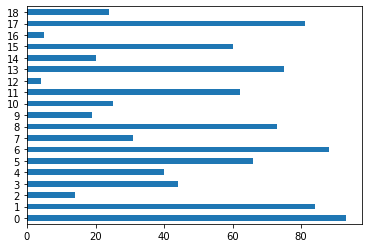

In [29]:
forest_importances = pd.Series(sortedf)

fig, ax = plt.subplots()
forest_importances.plot.barh()

# Naïve-Bayes

In [35]:
# from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [36]:
gnb_model = gnb.fit(X_train, y_train)

In [37]:
gnb_pred1 = gnb_model.predict(X_test)
gnb_pred_prob1 = gnb_model.predict_proba(X_test)

In [38]:
print("accuracy for unoptimised Gaussian naïve-bayes:", accuracy_score(y_test, gnb_pred1))
print("F1 score for unoptimised Gaussian naïve-bayes:", f1_score(y_test, gnb_pred1, average='macro'))
print("AUC score for unoptimised Gaussian naïve-bayes:", roc_auc_score(y_test, gnb_pred_prob1[:,1]))

accuracy for unoptimised Gaussian naïve-bayes: 0.06671554252199413
F1 score for unoptimised Gaussian naïve-bayes: 0.06669096190324154
AUC score for unoptimised Gaussian naïve-bayes: 0.6539357555665068


## Voting Classifier

In [39]:
# from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('lr', glm), ('rf', rfmodel1), ('nb', gnb), ('svm', svm1), ('knn', kmodel1)],
    voting='hard')

In [40]:
voting_clf.fit(X_train, y_train)

/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('nb', GaussianNB()),
                             ('svm', SVC(random_state=42)),
                             ('knn', KNeighborsClassifier())])

In [41]:
for clf in (glm, rfmodel1, gnb, svm1, kmodel1, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, roc_auc_score(y_test, y_pred_prob[:,1]))

/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.6539357555665068
RandomForestClassifier 0.6539357555665068
GaussianNB 0.6539357555665068
SVC 0.6539357555665068
KNeighborsClassifier 0.6539357555665068


/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 0.6539357555665068


# SMOTE + Undersampling

In [34]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [35]:
X = data.drop(['Bankrupt?'],axis=1)
y = data['Bankrupt?']

In [36]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
ys_train.value_counts()

0    4631
1     142
Name: Bankrupt?, dtype: int64

In [37]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
counter = Counter(ys_train)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
Xs_train, ys_train = pipeline.fit_resample(Xs_train, ys_train)
# summarize the new class distribution
counter = Counter(ys_train)
print(counter)
ys_train.value_counts()

Counter({0: 4631, 1: 142})
Counter({0: 2315, 1: 1389})


0    2315
1    1389
Name: Bankrupt?, dtype: int64

In [38]:
Xs_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.540048,0.594690,0.590717,0.611244,0.611244,0.999075,0.797514,0.809424,0.303520,0.781694,...,0.831117,0.003886,0.624112,0.611243,0.842202,0.276924,0.026792,0.565164,1,0.053404
1,0.535124,0.584714,0.581562,0.634688,0.634688,0.999216,0.797731,0.809572,0.303604,0.781837,...,0.825341,0.006358,0.623650,0.634688,0.841789,0.276639,0.026796,0.565179,1,0.059684
2,0.573880,0.614751,0.635205,0.622177,0.622177,0.999411,0.797939,0.809813,0.303561,0.782104,...,0.832859,0.133316,0.623745,0.622178,0.842988,0.279574,0.026897,0.565618,1,0.030017
3,0.477843,0.543066,0.530971,0.601551,0.601385,0.998982,0.797425,0.809347,0.303560,0.781594,...,0.802411,0.002498,0.624508,0.601549,0.840452,0.277248,0.026933,0.565754,1,0.047947
4,0.487983,0.557457,0.541892,0.596485,0.596485,0.998972,0.797409,0.809333,0.303552,0.781592,...,0.808830,0.080828,0.624085,0.596480,0.841604,0.285555,0.026818,0.565281,1,0.019134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3699,0.466272,0.392142,0.508906,0.580693,0.580693,0.998616,0.795189,0.807192,0.300417,0.781099,...,0.669192,0.007988,0.623273,0.580694,0.893092,0.261437,0.027622,0.566956,1,0.014607
3700,0.468397,0.468623,0.499091,0.589823,0.590163,0.998710,0.796845,0.808756,0.303115,0.781033,...,0.747830,0.016465,0.624421,0.589819,0.835252,0.282672,0.026560,0.567529,1,0.022594
3701,0.409007,0.475371,0.465178,0.601156,0.601156,0.998874,0.796964,0.808923,0.302980,0.781202,...,0.754198,0.007840,0.622901,0.601152,0.833144,0.291845,0.026580,0.563846,1,0.015872
3702,0.484854,0.463908,0.512766,0.576734,0.576919,0.998515,0.796669,0.808609,0.303216,0.780840,...,0.745831,0.064932,0.624372,0.576730,0.832612,0.289444,0.026642,0.564323,1,0.019153


In [40]:
column_list =  Xs_train.columns

## MUTUAL INFORMATION CLASSIFIER

In [14]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(Xs_train, ys_train)
mi

array([0.26485006, 0.25945362, 0.25816172, 0.11793965, 0.10544986,
       0.17930155, 0.26011864, 0.27967874, 0.24038886, 0.27622956,
       0.02424447, 0.1251808 , 0.1121036 , 0.00680173, 0.10064867,
       0.22713555, 0.22401429, 0.21838627, 0.3294411 , 0.1550061 ,
       0.0245514 , 0.26648348, 0.30869612, 0.07887602, 0.07417566,
       0.12829485, 0.12560854, 0.11078945, 0.24768602, 0.150069  ,
       0.08868917, 0.0547595 , 0.13424215, 0.12214812, 0.21216736,
       0.22861757, 0.19828202, 0.1989351 , 0.0374577 , 0.25535879,
       0.0880634 , 0.17777126, 0.28164142, 0.08620029, 0.33265423,
       0.00501072, 0.        , 0.08362609, 0.11286997, 0.22390975,
       0.01572599, 0.15971528, 0.06247181, 0.14208877, 0.03442846,
       0.02273086, 0.08767089, 0.12663487, 0.05269883, 0.13939142,
       0.10656746, 0.1200789 , 0.01578016, 0.02011886, 0.10749945,
       0.20494006, 0.01988614, 0.26855406, 0.25746293, 0.05740672,
       0.02690029, 0.01987926, 0.1175209 , 0.13506604, 0.06191

In [15]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    X,y,test_size=0.3,random_state=0)

Xm_train.shape, Xm_test.shape

((4773, 95), (2046, 95))

Text(0, 0.5, 'Mutual Information')

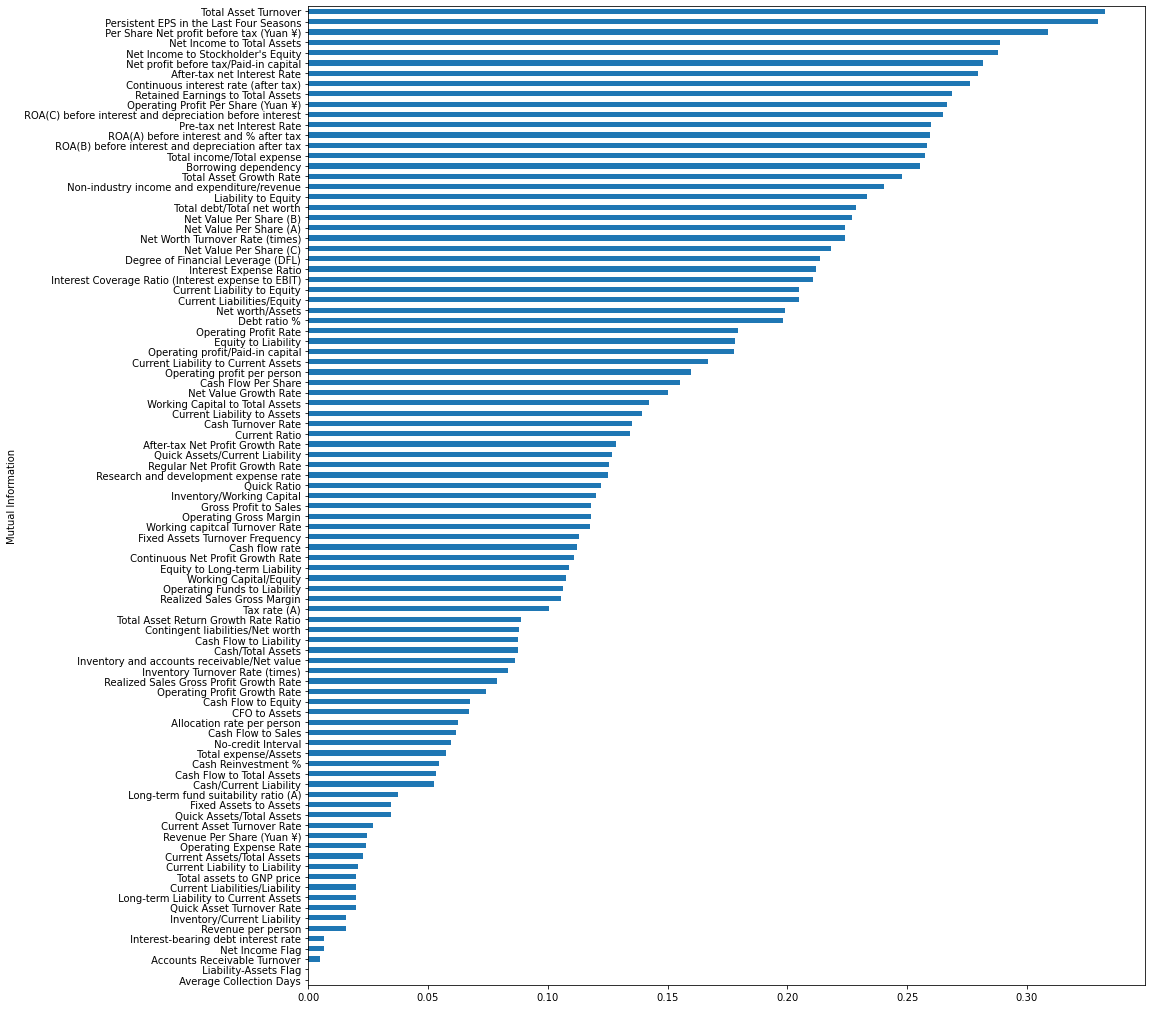

In [16]:
mi = pd.Series(mi)
mi.index = Xm_train.columns
mi.sort_values().plot.barh(figsize=(15, 18))
plt.ylabel('Mutual Information')

In [19]:
# select features
sel_ = SelectKBest(mutual_info_classif, k=10).fit(Xm_train, ym_train)

# display features
Xm_train.columns[sel_.get_support()]

Index([' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital', ' Net Income to Total Assets',
       ' Net Income to Stockholder's Equity', ' Equity to Liability'],
      dtype='object')

## DATA SCALING

In [20]:
sc = StandardScaler()
Xs_train = sc.fit_transform(Xs_train)

## LOGISTIC REGRESSION

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
logreg = LogisticRegression(solver="saga", max_iter=5500)
rfe = RFE(logreg, n_features_to_select=21)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

[False False False False False False False False False False  True  True
 False  True False False False False False False  True False False False
 False False False False  True  True False False  True False False  True
 False False False False False False False False False  True  True  True
 False False  True False  True False False False False  True  True False
 False False  True False False False  True False False False  True False
 False  True False  True False False False False False False False False
 False False  True False False False False False False False False]
[32 23 24 28 30  6 16 15 47 17  1  1 37  1 60 56 54 55 50 43  1 61 53 69
 12 20 21 58  1  1 52 40  1  3 26  1 67  7 72 42 74 62 57 39 59  1  1  1
  4 65  1 38  1  9 34 25 48  1  1 66 41 49  1 13 18 46  1  8 73 71  1  2
 33  1 22  1 14 45 63 19 36 31 44 75 70 10  1 27 29 11 51 68 35  5 64]
Column: 0, Selected False, Rank: 32.000
Column: 1, Selected False, Rank: 23.000
Column: 2, Selected False, Rank: 24.000
Column: 3, 

In [ ]:
valid_columns =[]
for i in range(X.shape[1]):
    if rfe.support_[i] == True:
        valid_columns.append(column_list[i])

In [42]:
print (valid_columns)

[' Operating Expense Rate', ' Research and development expense rate', ' Interest-bearing debt interest rate', ' Revenue Per Share (Yuan ¥)', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Current Ratio', ' Total debt/Total net worth', ' Accounts Receivable Turnover', ' Average Collection Days', ' Inventory Turnover Rate (times)', ' Revenue per person', ' Allocation rate per person', ' Quick Assets/Current Liability', ' Cash/Current Liability', ' Inventory/Current Liability', ' Long-term Liability to Current Assets', ' Current Asset Turnover Rate', ' Cash Turnover Rate', ' Fixed Assets to Assets', ' Total assets to GNP price']


In [32]:
Xs_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [18]:
Xs_train.colnames()

AttributeError: 'DataFrame' object has no attribute 'colnames'

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
from numpy import mean
model = LogisticRegression(solver="saga", max_iter = 5500, random_state = 42)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))
print(model.coef_, model.intercept_)

NameError: name 'mean' is not defined

In [86]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit(max_iter=6000)
print(result.summary2())

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

## KNN

In [11]:
#from sklearn.neighbors import KNeighborsClassifier
kmodel2 = KNeighborsClassifier(n_neighbors = 5)
kmodel2.fit(Xs_train, ys_train)

KNeighborsClassifier()

In [12]:
kmodel_pred2 = kmodel2.predict(Xs_test)
kmodel_pred_prob2 = kmodel2.predict_proba(Xs_test)

/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [13]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
# from sklearn import metrics

print("AUC score of unoptimised K-Nearest Neighbor:", roc_auc_score(ys_test, kmodel_pred_prob2[:,1]))

AUC score of unoptimised K-Nearest Neighbor: 0.5237615957890348


### Optimization

In [14]:
params = list(range(7,30))

In [15]:
grid_search = GridSearchCV(cv = 5, estimator = KNeighborsClassifier(), param_grid = {'n_neighbors': params, 
                                                                'metric':["manhattan", "euclidean", "minkowski"]},
                          n_jobs = 6, scoring = 'roc_auc', verbose =1)
grid_search.fit(Xs_train, ys_train)

Fitting 5 folds for each of 69 candidates, totalling 345 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'metric': ['manhattan', 'euclidean', 'minkowski'],
                         'n_neighbors': [7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                         17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                                         27, 28, 29]},
             scoring='roc_auc', verbose=1)

In [16]:
print("Best parameters for K-Nearest Neighbor: {}".format(grid_search.best_params_))
print("Best cross-validation score for K-Nearest Neighbor: {:.2f}".format(grid_search.best_score_))

Best parameters for K-Nearest Neighbor: {'metric': 'manhattan', 'n_neighbors': 7}
Best cross-validation score for K-Nearest Neighbor: 0.98


In [17]:
optimal_KNN_model = KNeighborsClassifier(**grid_search.best_params_)

optimal_KNN_model.fit(Xs_train, ys_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [18]:
optimalKNN_pred = optimal_KNN_model.predict(Xs_test)
optimalKNN_pred_prob = optimal_KNN_model.predict_proba(Xs_test)

/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [19]:
print("AUC score of optimised K-Nearest Neighbor:", roc_auc_score(ys_test, optimalKNN_pred_prob[:,1]))

AUC score of optimised K-Nearest Neighbor: 0.4868472482801751


## SVM

In [20]:
svm2 = SVC()
svm2.fit(Xs_train, ys_train)

SVC()

In [21]:
svm_pred2 = svm2.predict(Xs_test)

/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [22]:
print("AUC score of unoptimised SVM:", roc_auc_score(ys_test, svm_pred2))

AUC score of unoptimised SVM: 0.5


### Optimization

In [123]:
grid_search = GridSearchCV(SVC(), param_grid = {'C': [0.001, 0.1, 0.5, 1, 10],
              'probability': [True]}, cv=5, n_jobs=5,
            return_train_score=True, scoring='roc_auc', verbose=2)

In [124]:
grid_search.fit(Xs_train, ys_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=5,
             param_grid={'C': [0.001, 0.1, 0.5, 1, 10], 'probability': [True]},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [125]:
print("Best parameters for Support Vector Machine: {}".format(grid_search.best_params_))
print("Best cross-validation score for Support Vector Machine: {:.2f}".format(grid_search.best_score_))

Best parameters for Support Vector Machine: {'C': 10, 'probability': True}
Best cross-validation score for Support Vector Machine: 0.92


In [126]:
optimal_svm_model = SVC(**grid_search.best_params_)

optimal_svm_model.fit(Xs_train, ys_train)

SVC(C=10, probability=True)

In [127]:
optimalsvm_pred = optimal_svm_model.predict(Xs_test)

In [128]:
print("AUC score of unoptimised SVM:", roc_auc_score(ys_test, optimalsvm_pred))

AUC score of unoptimised SVM: 0.6664321450906817


In [129]:
from sklearn.metrics import ConfusionMatrixDisplay

In [130]:
titles_options = [("Confusion matrix without normalization", None), ("Normalized confusion matrix", "true"),]

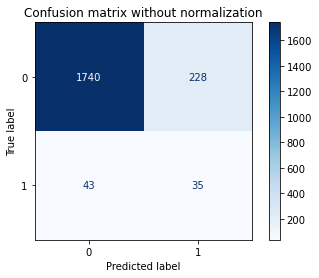

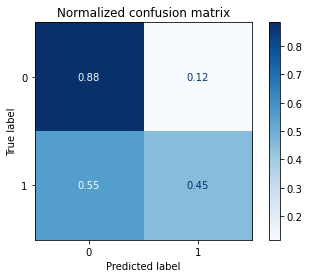

In [131]:
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(optimal_svm_model, Xs_test, ys_test, cmap = plt.cm.Blues, normalize=normalize,)
    disp.ax_.set_title(title)

# Naïve-Bayes

In [132]:
# from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [133]:
gnb_model1 = gnb.fit(Xs_train, ys_train)

In [134]:
gnb_pred2 = gnb_model1.predict(Xs_test)
gnb_pred_prob2 = gnb_model1.predict_proba(Xs_test)

In [135]:
print("accuracy for unoptimised Gaussian naïve-bayes:", accuracy_score(ys_test, gnb_pred2))
print("F1 score for unoptimised Gaussian naïve-bayes:", f1_score(ys_test, gnb_pred2, average='macro'))
print("AUC score for unoptimised Gaussian naïve-bayes:", roc_auc_score(ys_test, gnb_pred_prob2[:,1]))

accuracy for unoptimised Gaussian naïve-bayes: 0.0801564027370479
F1 score for unoptimised Gaussian naïve-bayes: 0.08011333231404327
AUC score for unoptimised Gaussian naïve-bayes: 0.6541034761309151


### Optimization

In [140]:
param_grid = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

grid_search = GridSearchCV(GaussianNB(), param_grid, cv=6,
                          return_train_score=True, scoring="accuracy")
grid_search.fit(Xs_train, ys_train)

ValueError: Invalid parameter alpha for estimator GaussianNB(). Check the list of available parameters with `estimator.get_params().keys()`.

In [137]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
#testing

In [ ]:
optimisednb = GaussianNB(**grid_search.best_params_)
optimisednb.fit(Xs_train, ys_train)
optimisednb_pred = optimisednb.predict(Xs_test)
optimisednb_pred_prob = optimisednb.predict_proba(Xs_test)

In [ ]:
print("accuracy for unoptimised Gaussian naïve-bayes:", accuracy_score(ys_test, optimisednb_pred))
print("F1 score for unoptimised Gaussian naïve-bayes:", f1_score(ys_test, optimisednb_pred, average='macro'))
print("AUC score for unoptimised Gaussian naïve-bayes:", roc_auc_score(ys_test, optimisednb_pred_prob))

# RANDOM FOREST

In [51]:
# from sklearn.ensemble import RandomForestClassifier
rfmodel2 = RandomForestClassifier(random_state = 42)
rfmodel2.fit(Xs_train, ys_train)

RandomForestClassifier(random_state=42)

In [52]:
y_pred2 = rfmodel2.predict(Xs_test)
y_pred_prob2 = rfmodel2.predict_proba(Xs_test)

In [53]:
sorted_f = rfmodel2.feature_importances_.argsort()
# names = feature_names[sorted_f[:19]]
sortedf = sorted_f[:19]

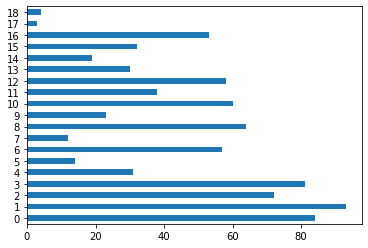

In [54]:
forest_importances = pd.Series(sortedf)


fig, ax = plt.subplots()
forest_importances.plot.barh()

### Optimization

In [147]:
param_grid = {'max_depth': [40, 45, 50, 55, 60, 65, 70],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'n_estimators': [300, 350, 400, 450, 500, 550]}

In [151]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid,
                          n_jobs=6, cv = 3, verbose = 2)
grid_search.fit(Xs_train, ys_train)

SyntaxError: positional argument follows keyword argument (2584521322.py, line 3)

In [149]:
print("Best parameters for Random Forest: {}".format(grid_search.best_params_))
print("Best cross-validation score for Random Forest: {:.2f}".format(grid_search.best_score_))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
optimal_rf_model = RandomForestClassifier(**grid_search.best_params_)
optimal_rf_model.fit(Xs_train, ys_train)

In [ ]:
optimalrf_pred = optimal_rf_model.predict(Xs_test)
optimalrf_pred_prob = optimal_rf_model.predict_proba(Xs_test)

In [ ]:
print("Accuracy of unoptimised Random Forest:", accuracy_score(ys_test, optimalrf_pred))
print("F1 score of unoptimised Random Forest:", f1_score(ys_test, optimalrf_pred, average = 'macro'))
print("Precision of unoptimised Random Forest:",metrics.precision_score(ys_test, optimalrf_pred, average='weighted'))
print("AUC score of unoptimised Random Forest:", roc_auc_score(ys_test, optimalrf_pred_prob))

In [ ]:
sorted_opt = optimal_rf_model.feature_importances_.argsort()
# names = feature_names[sorted_f[:19]]
sortedopt = sorted_f[:19]

In [ ]:
forest_importances = pd.Series(sortedopt)

fig, ax = plt.subplots()
forest_importances.plot.barh()